In [5]:
import cv2
import os
import sys
sys.path.append("..")
from models.models import MP, SAM
from models.config import DATA, WRITE_CONFIG, PLOT_CONFIG, ANALYZE_CONFIG, SETUP, XML_NAME
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import torch



In [6]:
torch.cuda.empty_cache()
sam = SAM()

In [7]:
average_mrd_1_error = []
average_mrd_2_error = []
number_pixels = []
filenames = []
torch.cuda.empty_cache()

# df = pd.read_csv('_SAM_TED_sam_no_mp_all_data_MAE.csv')

md = 'md_crop'
norm = 'normal_crop'
celeb = 'CELEB'

cfd = 'CFD'
ted = 'TED'



def get_embeddings(path, label):
    embeddings = []
    labels = [] 
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg')) and 'checkpoint' not in file:
                print(file[:-4])
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)

                filenames.append(file)
                features = sam.get_embeddings(image)

                # Move tensor to CPU, then convert to numpy, and flatten
                features_np = features.cpu().numpy().flatten()  
                embeddings.append(features_np)
                labels.append(label) 

                torch.cuda.empty_cache()

    return np.array(embeddings), labels

# Getting embeddings and labels for each dataset
md_embeddings, md_labels = get_embeddings(md, 'MD')
norm_embeddings,norm_labels = get_embeddings(norm, 'CLEFT')
celeb_embeddings, celeb_labels = get_embeddings(celeb, 'CELEB')
cfd_embeddings, cfd_labels = get_embeddings(cfd, 'CFD')
ted_embeddings, ted_labels = get_embeddings(ted, 'TED')


md_403_crop
md_524_crop
md_440_crop
md_257_crop
md_889_crop
md_207_crop
md_446_crop
md_288_crop
md_159_crop
md_455_crop
md_322_crop
md_113_crop
md_562_crop
md_137_crop
md_7_crop
md_84_crop
md_252_crop
md_569_crop
md_784_crop
md_770_crop
md_604_crop
md_593_crop
md_617_crop
md_150_crop
md_591_crop
md_128_crop
md_772_crop
md_378_crop
md_582_crop
md_349_crop
md_612_crop
md_153_crop
md_733_crop
md_482_crop
md_745_crop
md_866_crop
md_501_crop
md_73_crop
md_266_crop
md_325_crop
md_704_crop
md_21_crop
md_525_crop
md_871_crop
md_664_crop
md_307_crop
md_376_crop
md_253_crop
md_214_crop
md_886_crop
md_41_crop
md_448_crop
md_23_crop
md_233_crop
md_375_crop
md_707_crop
md_698_crop
md_209_crop
md_691_crop
md_545_crop
md_900_crop
md_187_crop
md_32_crop
md_717_crop
md_178_crop
md_141_crop
md_738_crop
md_346_crop
md_500_crop
md_258_crop
md_259_crop
md_264_crop
md_362_crop
md_499_crop
md_601_crop
md_802_crop
md_651_crop
md_248_crop
md_447_crop
md_495_crop
md_111_crop
md_42_crop
md_404_crop
md_640_crop
m

In [10]:
# print(md_embeddings.shape, norm_embeddings.shape, celeb_embed)
# Combining embeddings and labels 
all_embeddings = np.concatenate([md_embeddings, norm_embeddings, celeb_embeddings, cfd_embeddings, ted_embeddings])
all_labels = md_labels + norm_labels + celeb_labels+  cfd_labels + ted_labels 
# flattened_embeddings = np.array([embedding.cpu().flatten().numpy() for embedding in all_embeddings])


In [11]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(all_embeddings)

OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

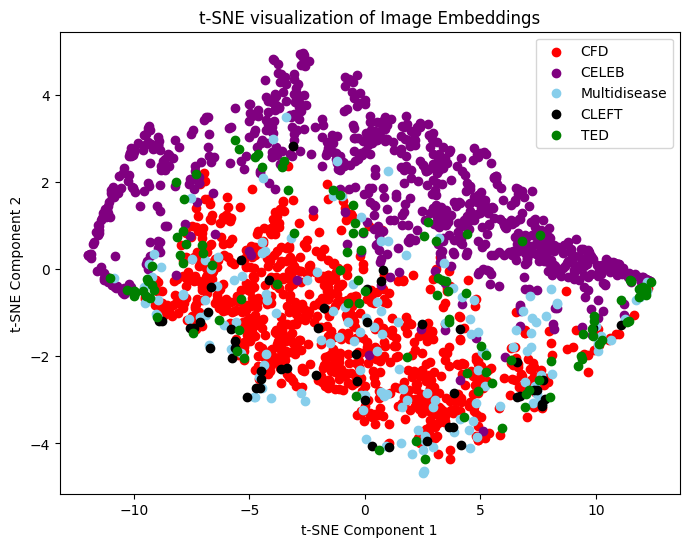

In [13]:

# Convert labels to a NumPy array for easier indexing
all_labels = np.array(all_labels)

# Separate the t-SNE results by label
tsne_md = tsne_results[all_labels == 'MD']
tsne_cleft = tsne_results[all_labels == 'CLEFT']
tsne_celeb = tsne_results[all_labels == 'CELEB']
tsne_cfd = tsne_results[all_labels == 'CFD']
tsne_ted = tsne_results[all_labels == 'TED']

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_cfd[:, 0], tsne_cfd[:, 1], color='red', label='CFD')
plt.scatter(tsne_celeb[:, 0], tsne_celeb[:, 1], color='purple', label='CELEB')
plt.scatter(tsne_md[:, 0], tsne_md[:, 1], color='skyblue', label='Multidisease')
plt.scatter(tsne_cleft[:, 0], tsne_cleft[:, 1], color='black', label='CLEFT')
plt.scatter(tsne_ted[:, 0], tsne_ted[:, 1], color='green', label='TED')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of SAM Embeddings')
plt.legend()
plt.show()

In [ ]:
# base_path = '/home/georgie/fme/data/ted/ted_crop'
filenames_full_normal = []
filenames_full_md = []
normal_data = 'normal_crop'
md_data = 'md_crop'

for filename in filenames:
    if filename[0]=='n':
        image_path = os.path.join(normal_data, filename)
        filenames_full_normal.append(image_path)
    elif filename[0] =='m':
        image_path = os.path.join(md_data, filename)
        filenames_full_md.append(image_path)

In [ ]:
def compute_plot_coordinates(image, x, y, image_centers_area_size, offset, plot_size):
    image_height, image_width, _ = image.shape

    center_x = int(image_centers_area_size * x) + offset
    center_y = int(image_centers_area_size * (1 - y)) + offset

    # Calculate top-left coordinates, ensuring they're within the plot bounds
    tl_x = max(center_x - int(image_width / 2), 0)
    tl_y = max(center_y - int(image_height / 2), 0)

    # Calculate bottom-right coordinates, ensuring they're within the plot bounds
    br_x = min(tl_x + image_width, plot_size[1])
    br_y = min(tl_y + image_height, plot_size[0])

    return tl_x, tl_y, br_x, br_y


In [ ]:
import cv2

def scale_image(image, max_size):
    h, w = image.shape[:2]

    # Determine the scale factor, maintaining aspect ratio
    scale = max_size / max(h, w)

    # New dimensions
    new_w, new_h = int(w * scale), int(h * scale)

    # Resize the image
    resized_image = cv2.resize(image, (new_w, new_h))

    return resized_image


In [ ]:

# scale and move the coordinates so they fit [0; 1] range
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
 
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
 
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range
 
# extract x and y coordinates representing the positions of the images on T-SNE plot
tx = tsne_results[:, 0]
ty = tsne_results[:, 1]
 
tx = scale_to_01_range(tx)
ty = scale_to_01_range(ty)

In [ ]:
max_image_size = 150

s1=2000
plot_size = (s1,s1)
# init the plot as white canvas
tsne_plot = 255 * np.ones((s1, s1, 3), np.uint8)


border_size = 10  # Size of the border around images
normal_border_color = [135, 206, 235]  # Skyblue color in BGR
md_border_color = [255, 0, 0]  # Red color in BGR

# Prepare the data for plotting
data = zip(filenames, tx, ty)
counter = 0

for filename, x, y in data:
    # Determine the full image path and border color based on the filename
    if filename in [os.path.basename(path) for path in filenames_full_normal]:
        image_path = [path for path in filenames_full_normal if os.path.basename(path) == filename][0]
        border_color = normal_border_color
    elif filename in [os.path.basename(path) for path in filenames_full_md]:
        image_path = [path for path in filenames_full_md if os.path.basename(path) == filename][0]
        border_color = md_border_color
    else:
        continue  # Skip if the image doesn't belong to either category

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Scale the image
    image = scale_image(image, max_image_size)

    # Create a border around the image
    bordered_image = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT, value=border_color)

    # Compute the coordinates for the bordered image
    tl_x, tl_y, br_x, br_y = compute_plot_coordinates(bordered_image, x, y, 1900, 2, plot_size)
 
    # Place the bordered image on the t-SNE plot
    tsne_plot[tl_y:br_y, tl_x:br_x, :] = bordered_image
    counter += 1

print(counter)

figsize = (15, 15)  # This can be adjusted to your desired dimensions

# Create the figure with the defined size
plt.figure(figsize=figsize)
plt.title('Embeddings of Healthy and Pathologic Eyes Used for Analysis')
plt.axis('off')  # This will turn off both x and y-axis ticks and labels

plt.imshow(tsne_plot)
plt.show()

